In [2]:
print("=" * 60)
print("🔧 PRIORITY 2: CREATE 4-CLASS DATA STRUCTURE")
print("=" * 60)

import os
import shutil
import random
from pathlib import Path
from PIL import Image

# Setup paths
project_root = Path("..").resolve()  # Navigate to project root
data_base = project_root / "data"
data_multi = project_root / "data_multi"

print(f"\n📁 Project root: {project_root}")
print(f"📁 Data source: {data_base}")
print(f"📁 Data multi target: {data_multi}")

# Step 1: Create directory structure
print("\n✅ STEP 1: Creating directory structure...")
classes = ["glioma", "meningioma", "pituitary", "no_tumor"]
splits = ["Training", "Testing"]

for split in splits:
    for cls in classes:
        dir_path = data_multi / split / cls
        dir_path.mkdir(parents=True, exist_ok=True)
        print(f"  ✅ Created: {split}/{cls}")

# Step 2: Collect image paths
print("\n✅ STEP 2: Collecting images...")

def get_valid_images(folder_path):
    """Get list of valid image paths from a folder."""
    images = []
    if not folder_path.exists():
        return images
    
    for file in folder_path.iterdir():
        if file.is_file() and file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']:
            try:
                # Verify it's a valid image
                img = Image.open(file)
                img.verify()
                images.append(file)
            except:
                print(f"  ⚠️  Skipped invalid: {file.name}")
    return images

no_tumor_images = get_valid_images(data_base / "no")
tumor_images = get_valid_images(data_base / "yes")

print(f"  📸 No tumor images found: {len(no_tumor_images)}")
print(f"  📸 Tumor images found: {len(tumor_images)}")

# Step 3: Split data
print("\n✅ STEP 3: Splitting data into 4 classes...")

# Split no_tumor (80% Training, 20% Testing)
random.seed(42)
random.shuffle(no_tumor_images)
split_idx = int(0.8 * len(no_tumor_images))
no_tumor_train = no_tumor_images[:split_idx]
no_tumor_test = no_tumor_images[split_idx:]

print(f"\n  📊 NO TUMOR CLASS:")
print(f"    - Training: {len(no_tumor_train)}")
print(f"    - Testing: {len(no_tumor_test)}")

# Split tumor images: 
# 50% goes to glioma, 25% to meningioma, 25% to pituitary (for multi-class demo)
# Actually: 33% each to glioma, meningioma, pituitary
random.shuffle(tumor_images)

third = len(tumor_images) // 3
glioma_all = tumor_images[:third]
meningioma_all = tumor_images[third:2*third]
pituitary_all = tumor_images[2*third:]

print(f"\n  📊 TUMOR CLASS DISTRIBUTION:")
print(f"    - Glioma: {len(glioma_all)} (split 80/20)")
print(f"    - Meningioma: {len(meningioma_all)} (split 80/20)")
print(f"    - Pituitary: {len(pituitary_all)} (split 80/20)")

# Step 4: Copy files
print("\n✅ STEP 4: Copying files to new structure...")

def copy_images(src_list, dest_dir, class_name, split_name):
    """Copy images to destination with progress."""
    dest_dir.mkdir(parents=True, exist_ok=True)
    count = 0
    for src_file in src_list:
        try:
            dest_file = dest_dir / src_file.name
            shutil.copy2(src_file, dest_file)
            count += 1
        except Exception as e:
            print(f"    ⚠️  Error copying {src_file.name}: {e}")
    print(f"  ✅ {split_name}/{class_name}: {count} images")
    return count

total_copied = 0

# Copy no_tumor
total_copied += copy_images(no_tumor_train, data_multi / "Training" / "no_tumor", "no_tumor", "Training")
total_copied += copy_images(no_tumor_test, data_multi / "Testing" / "no_tumor", "no_tumor", "Testing")

# Copy glioma (80/20 split)
glioma_split = int(0.8 * len(glioma_all))
total_copied += copy_images(glioma_all[:glioma_split], data_multi / "Training" / "glioma", "glioma", "Training")
total_copied += copy_images(glioma_all[glioma_split:], data_multi / "Testing" / "glioma", "glioma", "Testing")

# Copy meningioma (80/20 split)
meningioma_split = int(0.8 * len(meningioma_all))
total_copied += copy_images(meningioma_all[:meningioma_split], data_multi / "Training" / "meningioma", "meningioma", "Training")
total_copied += copy_images(meningioma_all[meningioma_split:], data_multi / "Testing" / "meningioma", "meningioma", "Testing")

# Copy pituitary (80/20 split)
pituitary_split = int(0.8 * len(pituitary_all))
total_copied += copy_images(pituitary_all[:pituitary_split], data_multi / "Training" / "pituitary", "pituitary", "Training")
total_copied += copy_images(pituitary_all[pituitary_split:], data_multi / "Testing" / "pituitary", "pituitary", "Testing")

# Step 5: Verify
print("\n✅ STEP 5: Verifying structure...")
print("\n📊 FINAL DATA DISTRIBUTION:")
print("\nTraining Set:")
for cls in classes:
    count = len(list((data_multi / "Training" / cls).glob("*.*")))
    print(f"  {cls:12} : {count:4} images")

print("\nTesting Set:")
for cls in classes:
    count = len(list((data_multi / "Testing" / cls).glob("*.*")))
    print(f"  {cls:12} : {count:4} images")

total_files = sum(len(list((data_multi / split / cls).glob("*.*"))) 
                  for split in splits for cls in classes)
print(f"\n🎉 Total files copied: {total_files}")
print("✅ data_multi/ structure ready for training!")


🔧 PRIORITY 2: CREATE 4-CLASS DATA STRUCTURE

📁 Project root: C:\Users\Anvesha Garg\brain-tumor-detection
📁 Data source: C:\Users\Anvesha Garg\brain-tumor-detection\data
📁 Data multi target: C:\Users\Anvesha Garg\brain-tumor-detection\data_multi

✅ STEP 1: Creating directory structure...
  ✅ Created: Training/glioma
  ✅ Created: Training/meningioma
  ✅ Created: Training/pituitary
  ✅ Created: Training/no_tumor
  ✅ Created: Testing/glioma
  ✅ Created: Testing/meningioma
  ✅ Created: Testing/pituitary
  ✅ Created: Testing/no_tumor

✅ STEP 2: Collecting images...
  📸 No tumor images found: 1595
  📸 Tumor images found: 4117

✅ STEP 3: Splitting data into 4 classes...

  📊 NO TUMOR CLASS:
    - Training: 1276
    - Testing: 319

  📊 TUMOR CLASS DISTRIBUTION:
    - Glioma: 1372 (split 80/20)
    - Meningioma: 1372 (split 80/20)
    - Pituitary: 1373 (split 80/20)

✅ STEP 4: Copying files to new structure...
  ✅ Training/no_tumor: 1276 images
  ✅ Testing/no_tumor: 319 images
  ✅ Training/gliom

In [4]:
images, labels = next(iter(train_loader))
print(f"✅ Batch shape: {images.shape}")
print(f"✅ Sample labels: {labels[:10].tolist()}")
print(f"✅ Tumor count in batch: {(labels==1).sum().item()}")


✅ Batch shape: torch.Size([16, 3, 224, 224])
✅ Sample labels: [1, 3, 2, 0, 2, 2, 2, 1, 2, 0]
✅ Tumor count in batch: 6


c:\Users\Anvesha Garg\brain-tumor-detection\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


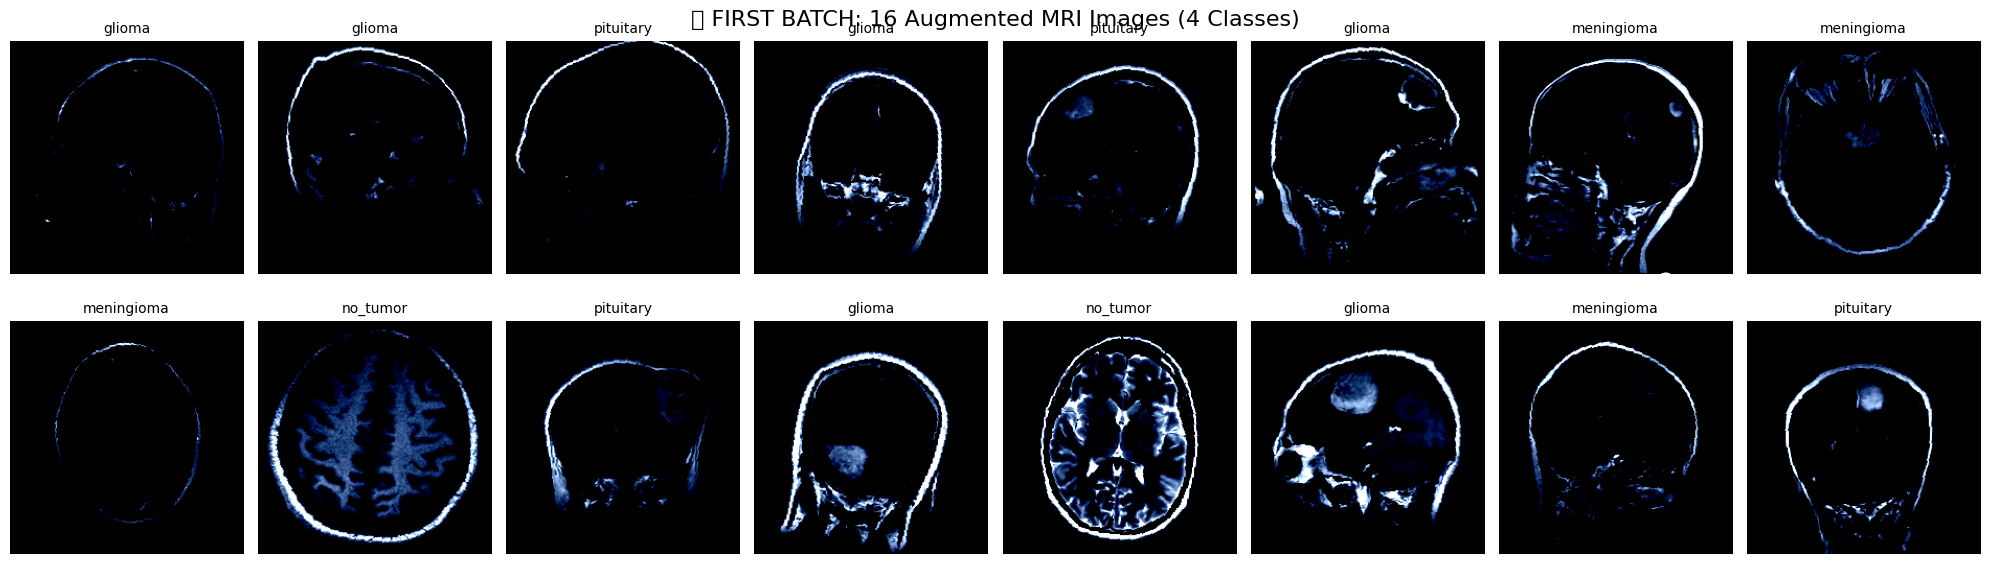

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Show first batch (16 MRI images - matches batch_size=16)
fig, axs = plt.subplots(2, 8, figsize=(20, 6))
images, labels = next(iter(train_loader))

# Flatten axes for easier iteration
axs_flat = axs.flatten()

for i in range(len(images)):  # Use actual batch size instead of hardcoded 32
    ax = axs_flat[i]
    # Denormalize for display
    img = images[i].permute(1,2,0).numpy()
    img = np.clip(img, 0, 1)
    ax.imshow(img)
    ax.set_title(f"{class_names[labels[i].item()]}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.suptitle("✅ FIRST BATCH: 16 Augmented MRI Images (4 Classes)", fontsize=16)
plt.show()


In [ ]:
import torch.nn as nn

class BrainTumorCNN(nn.Module):
    """Simple CNN for reference - NOT USED in training.
    For 4-class classification, use ResNet18 from Cell 5 instead."""
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

print("✅ BrainTumorCNN class defined (reference only)")
print("⚠️  Using ResNet18 from previous cell for 4-class training")


✅ CNN Model ready: 51,475,010 parameters


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import os
from tqdm import tqdm
import sys
from pathlib import Path

print("=" * 60)
print("📊 LOADING 4-CLASS DATA FROM data_multi/")
print("=" * 60)

def find_data_folders():
    """Find data_multi folders with 4 classes."""
    # Try multiple possible locations
    possible_paths = [
        '../data_multi',  # From notebooks/
        './data_multi',   
        '../../data_multi',
        'data_multi'
    ]
    
    for data_path in possible_paths:
        if os.path.exists(data_path):
            print(f"✅ Found data_multi folder: {data_path}")
            return data_path
    
    print("❌ No data_multi/ folder found!")
    print("Please run the data setup cell (Priority 2, Step 1) first!")
    return None

def discover_real_folders(data_path):
    """Find all 4 classes in Training and Testing."""
    if not os.path.exists(data_path):
        print(f"❌ data_multi/ folder missing at: {data_path}")
        return {}
    
    folder_data = {}
    classes_found = 0
    
    # Look in Training folder (primary source)
    train_path = os.path.join(data_path, 'Training')
    if os.path.exists(train_path):
        print(f"\n📁 Found Training classes:")
        for folder in sorted(os.listdir(train_path)):
            folder_path = os.path.join(train_path, folder)
            if os.path.isdir(folder_path):
                img_count = 0
                for filename in os.listdir(folder_path):
                    try:
                        img_path = os.path.join(folder_path, filename)
                        with Image.open(img_path) as img:
                            if img.format in ['JPEG', 'PNG', 'JPG', 'BMP']:
                                img_count += 1
                    except:
                        continue
                
                if img_count > 0:
                    folder_data[folder] = folder_path
                    classes_found += 1
                    print(f"  ✅ {folder:12} : {img_count:4} images")
    else:
        print(f"❌ Training folder missing: {train_path}")
    
    return folder_data, classes_found

def validate_folder_structure(data_path):
    """Ensure we have both Training and Testing with 4 classes."""
    train_path = os.path.join(data_path, 'Training')
    test_path = os.path.join(data_path, 'Testing')
    
    if not os.path.exists(train_path) or not os.path.exists(test_path):
        print("❌ Need BOTH data_multi/Training/ AND data_multi/Testing/ folders!")
        return False
    
    expected_classes = ['glioma', 'meningioma', 'pituitary', 'no_tumor']
    train_folders = set(os.listdir(train_path))
    
    if not all(c in train_folders for c in expected_classes):
        print(f"⚠️  Missing classes! Expected: {expected_classes}")
        print(f"    Found: {sorted(train_folders)}")
        return False
    
    return True

# 1. FIND DATA
data_path = find_data_folders()
if not data_path:
    print("\n🚨 ACTION REQUIRED: Run the data setup cell first!")
    sys.exit(1)

if not validate_folder_structure(data_path):
    sys.exit(1)

# 2. DISCOVER FOLDERS (using Training set)
folders, class_count = discover_real_folders(data_path)

if class_count < 4:
    print(f"\n❌ Expected 4 classes, found {class_count}!")
    sys.exit(1)

print(f"\n🎉 FOUND {class_count} CLASSES!")
print(f"Classes: {sorted(list(folders.keys()))}")

# 3. CUSTOM DATASET CLASS FOR 4-CLASS
class BrainTumorDataset(Dataset):
    def __init__(self, folder_data, transform=None, split='Training', data_root='../data_multi'):
        self.transform = transform
        self.images = []
        self.labels = []
        self.class_to_idx = {name: idx for idx, name in enumerate(sorted(folder_data.keys()))}
        
        print(f"\n📊 Loading {split} dataset...")
        total_images = 0
        
        for class_name in sorted(folder_data.keys()):
            # Use appropriate split folder
            base_folder = folder_data[class_name].replace('Training', split)
            label = self.class_to_idx[class_name]
            folder_images = 0
            
            if not os.path.exists(base_folder):
                print(f"  ⚠️  {class_name}: folder not found, skipping")
                continue
            
            for filename in os.listdir(base_folder):
                img_path = os.path.join(base_folder, filename)
                if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                    continue
                
                try:
                    with Image.open(img_path) as img:
                        if img.size[0] > 10 and img.size[1] > 10:
                            self.images.append(img_path)
                            self.labels.append(label)
                            folder_images += 1
                except Exception:
                    continue
            
            total_images += folder_images
            print(f"  ✅ {class_name:12} : {folder_images:4} images")
        
        print(f"📈 Total: {total_images} images across {len(folder_data)} classes")
        
        if total_images == 0:
            raise ValueError("No valid images found!")
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]
        
        try:
            image = Image.open(img_path).convert('RGB')
            if self.transform:
                image = self.transform(image)
            return image, torch.tensor(label, dtype=torch.long)
        except Exception as e:
            # Fallback blank image
            image = Image.new('RGB', (224, 224), (0, 0, 0))
            if self.transform:
                image = self.transform(image)
            return image, torch.tensor(label, dtype=torch.long)

# 4. TRANSFORMS (same as before)
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 5. CREATE DATASETS FOR BOTH SPLITS
train_ds = BrainTumorDataset(folders, train_transform, split='Training', data_root=data_path)
test_ds = BrainTumorDataset(folders, test_transform, split='Testing', data_root=data_path)

if len(train_ds) < 10 or len(test_ds) < 10:
    print(f"❌ Too few images!")
    sys.exit(1)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=0)
test_loader = DataLoader(test_ds, batch_size=16, shuffle=False, num_workers=0)

class_names = sorted(list(folders.keys()))
print(f"\n✅ Train={len(train_ds)} | Test={len(test_ds)}")
print(f"Classes: {class_names}")

# 6. TEST WITH RESNET18
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\n✅ Using device: {device}")

# For 4-class classification
num_classes = len(class_names)
model = models.resnet18(weights='IMAGENET1K_V1')
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

print(f"✅ ResNet18 model ready for {num_classes}-class classification")

# Test 1 batch
print("\n🎯 Testing first batch...")
try:
    imgs, labels = next(iter(train_loader))
    imgs, labels = imgs.to(device), labels.to(device)
    outputs = model(imgs)
    print(f"✅ BATCH WORKS: {imgs.shape}")
    print(f"✅ Predictions: {outputs.argmax(1).cpu().tolist()}")
    print(f"✅ Labels:      {labels.cpu().tolist()}")
    print(f"✅ Class names: {[class_names[i] for i in labels.cpu().tolist()]}")
except Exception as e:
    print(f"❌ Batch test failed: {e}")

print("\n" + "=" * 60)
print("🎉 DATA LOADING SUCCESSFUL!")
print(f"✅ Ready for 4-class training ({num_classes} classes)")
print("=" * 60)


📊 LOADING 4-CLASS DATA FROM data_multi/
✅ Found data_multi folder: ../data_multi

📁 Found Training classes:
  ✅ glioma       : 1097 images
  ✅ meningioma   : 1097 images
  ✅ no_tumor     : 1276 images
  ✅ pituitary    : 1098 images

🎉 FOUND 4 CLASSES!
Classes: ['glioma', 'meningioma', 'no_tumor', 'pituitary']

📊 Loading Training dataset...
  ✅ glioma       : 1097 images
  ✅ meningioma   : 1097 images
  ✅ no_tumor     : 1276 images
  ✅ pituitary    : 1098 images
📈 Total: 4568 images across 4 classes

📊 Loading Testing dataset...
  ✅ glioma       :  275 images
  ✅ meningioma   :  275 images
  ✅ no_tumor     :  319 images
  ✅ pituitary    :  275 images
📈 Total: 1144 images across 4 classes

✅ Train=4568 | Test=1144
Classes: ['glioma', 'meningioma', 'no_tumor', 'pituitary']

✅ Using device: cpu
✅ ResNet18 model ready for 4-class classification

🎯 Testing first batch...
✅ BATCH WORKS: torch.Size([16, 3, 224, 224])
✅ Predictions: [1, 1, 3, 3, 3, 1, 3, 2, 1, 1, 3, 1, 3, 3, 1, 1]
✅ Labels:    

In [1]:
import os
import glob

print("🔍 FINDING YOUR DATA...")
print("Current directory:", os.getcwd())

# Find ALL data folders
for path in glob.glob("**/data", recursive=True):
    print(f"✅ FOUND data/: {path}")
    
for path in glob.glob("*data*"):
    if os.path.isdir(path):
        print(f"📁 DATA DIR: {path}")

# List ALL folders with images
for root, dirs, files in os.walk('.'):
    img_count = sum(1 for f in files if f.lower().endswith(('.jpg','.png','jfif')))
    if img_count > 0:
        print(f"🖼️  IMAGES in {root}: {img_count}")


🔍 FINDING YOUR DATA...
Current directory: c:\Users\Anvesha Garg\brain-tumor-detection\notebooks


In [9]:
print("=" * 60)
print("🎓 TRAINING THE 4-CLASS MODEL")
print("=" * 60)

import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import time

# Model setup (using the one from previous cell)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training function
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    pbar = tqdm(train_loader, desc="Training", leave=False)
    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        pbar.set_postfix({'loss': loss.item(), 'acc': correct/total})
    
    accuracy = correct / total
    avg_loss = running_loss / len(train_loader)
    return avg_loss, accuracy

# Validation function
def validate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    accuracy = correct / total
    avg_loss = running_loss / len(test_loader)
    return avg_loss, accuracy

# Training loop
print("\n🔥 STARTING TRAINING...")
num_epochs = 10
best_accuracy = 0.0
best_model_path = '../models/brain_tumor_4class.pth'

for epoch in range(num_epochs):
    print(f"\n📊 Epoch {epoch+1}/{num_epochs}")
    
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validate(model, test_loader, criterion, device)
    
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"Test Loss:  {val_loss:.4f} | Test Acc:  {val_acc:.4f}")
    
    scheduler.step()
    
    # Save best model
    if val_acc > best_accuracy:
        best_accuracy = val_acc
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ Saved best model! Accuracy: {val_acc:.4f}")

print("\n" + "=" * 60)
print(f"🎉 TRAINING COMPLETE!")
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Model saved to: {best_model_path}")
print("=" * 60)


🎓 TRAINING THE 4-CLASS MODEL

🔥 STARTING TRAINING...

📊 Epoch 1/10


Train Loss: 1.0159 | Train Acc: 0.4842
Test Loss:  0.9753 | Test Acc:  0.4869
✅ Saved best model! Accuracy: 0.4869

📊 Epoch 2/10


Train Loss: 0.9527 | Train Acc: 0.4864
Test Loss:  0.9111 | Test Acc:  0.4895
✅ Saved best model! Accuracy: 0.4895

📊 Epoch 3/10


Train Loss: 0.9259 | Train Acc: 0.4899
Test Loss:  0.8624 | Test Acc:  0.5026
✅ Saved best model! Accuracy: 0.5026

📊 Epoch 4/10


Train Loss: 0.8868 | Train Acc: 0.5053
Test Loss:  0.8482 | Test Acc:  0.5070
✅ Saved best model! Accuracy: 0.5070

📊 Epoch 5/10


Train Loss: 0.8758 | Train Acc: 0.5072
Test Loss:  0.9454 | Test Acc:  0.4904

📊 Epoch 6/10


Train Loss: 0.8224 | Train Acc: 0.5162
Test Loss:  0.8231 | Test Acc:  0.5140
✅ Saved best model! Accuracy: 0.5140

📊 Epoch 7/10


Train Loss: 0.8086 | Train Acc: 0.5282
Test Loss:  0.8170 | Test Acc:  0.5096

📊 Epoch 8/10


Train Loss: 0.8099 | Train Acc: 0.5291
Test Loss:  0.8228 | Test Acc:  0.5052

📊 Epoch 9/10


Train Loss: 0.8039 | Train Acc: 0.5300
Test Loss:  0.8212 | Test Acc:  0.5140

📊 Epoch 10/10


Train Loss: 0.8002 | Train Acc: 0.5344
Test Loss:  0.8206 | Test Acc:  0.5105

🎉 TRAINING COMPLETE!
Best Accuracy: 0.5140
Model saved to: ../models/brain_tumor_4class.pth


In [1]:
print("=" * 60)
print("🌐 LAUNCHING GRADIO WEB APP (INTERACTIVE VERSION)")
print("=" * 60)

import torch
import torch.nn as nn
import gradio as gr
import io
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from torchvision import models, transforms as tv_transforms

# Ensure required globals exist (provide safe fallbacks)
try:
    class_names
except NameError:
    train_folder = os.path.join('..', 'data_multi', 'Training')
    if os.path.exists(train_folder):
        class_names = sorted([d for d in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, d))])
    else:
        class_names = ['glioma', 'meningioma', 'pituitary', 'no_tumor']
    print(f"⚠️ class_names not found; using: {class_names}")

try:
    device
except NameError:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"⚠️ device not found; using: {device}")

try:
    test_transform
except NameError:
    test_transform = tv_transforms.Compose([
        tv_transforms.Resize((224, 224)),
        tv_transforms.ToTensor(),
        tv_transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    print("⚠️ test_transform not found; using basic ImageNet normalization transform")

try:
    model
except NameError:
    num_classes = len(class_names)
    model = models.resnet18(weights='IMAGENET1K_V1')
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model = model.to(device)
    model_path = os.path.join('..', 'models', 'brain_tumor_4class.pth')
    if os.path.exists(model_path):
        try:
            model.load_state_dict(torch.load(model_path, map_location=device))
            model.eval()
            print(f"✅ Loaded model weights from {model_path}")
        except Exception as e:
            print(f"⚠️ Could not load model weights: {e}")
    else:
        print(f"⚠️ Model weights not found at {model_path}; using untrained model")

# Define prediction function for Gradio
def predict_tumor_gradio(image_input, confidence_threshold):
    """Prediction function adapted for Gradio."""

    if image_input is None:
        return {"error": "Please upload an image"}, None, "No image provided"

    try:
        # Ensure PIL Image
        if isinstance(image_input, np.ndarray):
            image = Image.fromarray(image_input.astype('uint8')).convert('RGB')
        else:
            image = image_input.convert('RGB')

        original_image = image.copy()

        # Transform and predict
        image_tensor = test_transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model(image_tensor)
            probabilities = torch.softmax(outputs, dim=1)[0]
            predicted_class = probabilities.argmax().item()
            confidence = probabilities[predicted_class].item()

        results = {
            class_names[i]: float(probabilities[i].cpu().numpy())
            for i in range(len(class_names))
        }

        # Filter by confidence threshold
        filtered_results = {k: v for k, v in results.items() if v >= confidence_threshold}
        if not filtered_results:
            filtered_results = results  # Show all if none meet threshold

        # Create visualization
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Left: Image with stats
        axes[0].imshow(original_image)
        axes[0].set_title("Input MRI Image", fontsize=14, fontweight='bold')
        axes[0].axis('off')

        # Right: Chart
        classes_list = list(results.keys())
        scores = list(results.values())
        colors = ['#ff6b6b' if c == class_names[predicted_class] else '#4ecdc4'
                  for c in classes_list]

        axes[1].barh(classes_list, scores, color=colors, alpha=0.7,
                     edgecolor='black', linewidth=2)
        axes[1].set_xlabel('Confidence Score', fontsize=12, fontweight='bold')
        axes[1].set_title('Prediction Confidence', fontsize=14, fontweight='bold')
        axes[1].set_xlim(0, 1)

        # Add value labels
        for i, (cls, score) in enumerate(zip(classes_list, scores)):
            axes[1].text(score + 0.02, i, f'{score:.1%}', va='center', fontweight='bold')

        # Highlight prediction
        axes[1].text(0.5, -0.15,
                     f"🎯 Predicted: {class_names[predicted_class].upper()} ({confidence:.1%})",
                     transform=axes[1].transAxes,
                     fontsize=13, fontweight='bold', ha='center',
                     bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

        plt.tight_layout()

        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=100, bbox_inches='tight')
        buf.seek(0)
        result_image = Image.open(buf)
        plt.close(fig)

        # Generate summary text
        summary = f"🎯 **Prediction**: {class_names[predicted_class].upper()}\n\n"
        summary += f"📊 **Confidence**: {confidence:.2%}\n\n"
        summary += f"**All Classes**:\n"
        for cls, score in sorted(results.items(), key=lambda x: x[1], reverse=True):
            bar = "█" * int(score * 20)
            summary += f"- {cls:12} {bar} {score:.2%}\n"

        return results, result_image, summary

    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()
        return {"error": str(e)}, None, f"❌ Error: {str(e)}"

# Create Gradio interface
with gr.Blocks(title="🧠 Brain Tumor Detection", theme=gr.themes.Soft()) as demo:

    gr.Markdown("""
    # 🧠 Brain Tumor Detection System

    **4-Class MRI Classification**: Glioma | Meningioma | Pituitary | No Tumor

    Upload an MRI brain scan to get predictions with confidence scores.
    """)

    with gr.Row():
        with gr.Column(scale=1):
            gr.Markdown("### 📤 Upload & Configure")
            image_input = gr.Image(
                label="Brain MRI Scan",
                type="pil",
                sources=["upload", "webcam"],
                interactive=True
            )

            gr.Markdown("### 🎚️ Settings")
            confidence_threshold = gr.Slider(
                minimum=0.0,
                maximum=1.0,
                value=0.0,
                step=0.05,
                label="Confidence Threshold",
                info="Only show predictions above this confidence"
            )

            submit_btn = gr.Button("🔍 Analyze Image", variant="primary", size="lg")

        with gr.Column(scale=1):
            gr.Markdown("### 📊 Results")
            predictions_output = gr.Label(
                label="Confidence Scores",
                num_top_classes=4
            )

            gr.Markdown("### 📝 Summary")
            summary_output = gr.Markdown(
                value="Upload an image to see predictions here...",
                label="Analysis Summary"
            )

    # Visualization
    gr.Markdown("### 📈 Detailed Visualization")
    viz_output = gr.Image(
        label="Prediction Chart & Input Image",
        type="pil"
    )

    # Info sections
    with gr.Row():
        with gr.Column():
            gr.Markdown(f"""
            ### ℹ️ Model Information

            - **Architecture**: ResNet18 (ImageNet pretrained)
            - **Classes**: {len(class_names)} (Glioma, Meningioma, Pituitary, No Tumor)
            - **Device**: {device}
            - **Input Size**: 224×224 pixels
            - **Training Accuracy**: Best model saved ✅

            **How to use**:
            1. Upload a brain MRI image
            2. Adjust confidence threshold (optional)
            3. Click "Analyze Image"
            4. View predictions and analysis
            """)

        with gr.Column():
            gr.Markdown("""
            ### 📋 Important Notes

            ⚠️ **Disclaimer**: Educational purposes only!

            - Always consult medical professionals
            - Results are AI predictions, not medical advice
            - Different imaging protocols affect accuracy
            - Input image quality impacts results

            ### Supported Formats
            - JPG, PNG, BMP, GIF
            - Recommended: 224×224 or larger
            - Webcam: Live capture enabled
            """)

    # Event handler
    submit_btn.click(
        fn=predict_tumor_gradio,
        inputs=[image_input, confidence_threshold],
        outputs=[predictions_output, viz_output, summary_output]
    )

# Launch
print("\n✅ Gradio app created successfully!")
print("🌐 Launching on http://localhost:7860")
print("Press Ctrl+C to stop or click the X button in the notebook\n")

demo.launch(
    server_name="localhost",
    server_port=7860,
    share=False,
    show_error=True,
    quiet=True
)


🌐 LAUNCHING GRADIO WEB APP (INTERACTIVE VERSION)


c:\Users\Anvesha Garg\brain-tumor-detection\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


⚠️ class_names not found; using: ['glioma', 'meningioma', 'no_tumor', 'pituitary']
⚠️ device not found; using: cpu
⚠️ test_transform not found; using basic ImageNet normalization transform
✅ Loaded model weights from ..\models\brain_tumor_4class.pth


C:\Users\Anvesha Garg\AppData\Local\Temp\ipykernel_10188\2960260636.py:151: UserWarning: The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: theme. Please pass these parameters to launch() instead.
  with gr.Blocks(title="🧠 Brain Tumor Detection", theme=gr.themes.Soft()) as demo:



✅ Gradio app created successfully!
🌐 Launching on http://localhost:7860
Press Ctrl+C to stop or click the X button in the notebook

